# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
You're on Google Colab


Noticing user about files that has to be in the current working directory.

In [3]:
def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

Installations and importations required for Google Colab version.

In [4]:
# !pip freeze > requirements.txt

In [5]:
import os

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
    !pip install -r requirements.txt
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')
    file_required('requirements.txt')
    !pip install -r requirements.txt

     |████████████████████████████████| 133kB 10.3MB/s 
     |████████████████████████████████| 6.3MB 15.7MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 163kB 60.7MB/s 
     |████████████████████████████████| 880kB 51.8MB/s 
     |████████████████████████████████| 2.0MB 42.6MB/s 
     |████████████████████████████████| 7.5MB 46.3MB/s 
     |████████████████████████████████| 163kB 58.9MB/s 
     |████████████████████████████████| 3.0MB 34.8MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 368kB 48.5MB/s 
     |████████████████████████████████| 29.8MB 118kB/s 
     |████████████████████████████████| 1.1MB 57.4MB/s 
     |████████████████████████████████| 307kB 49.5MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 1.3MB 41.5MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 122kB 47.3MB/s 


In [6]:
from P4_functions import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


Importation of modules and packages. 

In [7]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

import warnings
warnings.filterwarnings('ignore')

# from ipywidgets import interact, interact_manual

import dill

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

import category_encoders as ce

import scipy.stats as st

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import * 
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

Setting pandas display options

In [8]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 100,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

To play audio text-to-speech during execution.

In [9]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [10]:
plot_enabled = False
save_enabled = False

In [11]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [12]:
if is_colab==True:
    path_csv = 'DATA/Cleaned_data.csv' 
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv = '../DATA/Cleaned_data.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df = pd.read_csv(path_csv, sep=',', index_col='Unnamed: 0',
                 low_memory=True, encoding ='utf-8')

print("-----> importation of .csv in the notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv in the notebook OK


In [13]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'ZipCode', 'La

In [14]:
df['ZipCode'] = df['ZipCode'].apply(str).astype('object')
df['CouncilDistrictCode'] = df['CouncilDistrictCode'].apply(str).astype('object')

In [15]:
prop_Q_cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
               'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
               'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
               'ExtsurfVolRatio',
            'Outlier'] # 'ENERGYSTARScore',
prop_C_cols = ['Neighborhood', 'ZipCode', 'CouncilDistrictCode',
               'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
               'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']
target_cols = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
                'SiteEnergyUseWN(kBtu)_log', 'TotalGHGEmissions_log']

In [16]:
speak('Dataset successfully imported')

### 0.2 Overview

Printing total nb and percentage of null

In [17]:
print_null_pct(df)

nb of null:  2191 
pct of null:  2.0


Showing columns where there are still NaN values

In [18]:
df.isna().sum(axis=0)[df.isna().sum(axis=0)!=0]

TaxParcelIdentificationNumber       1
ENERGYSTARScore                   542
Comments                         1648
dtype: int64

In [19]:
speak('Description overview done')

## 1 Data preprocessing

### 1.1 Target data transformation

We already found in the Cleaning_EDA notebook that the distribution of the target data could become almost normal with logarithmic transformation.

Here are the histograms of transformed values.

#### SiteEnergyUseWN(kBtu)

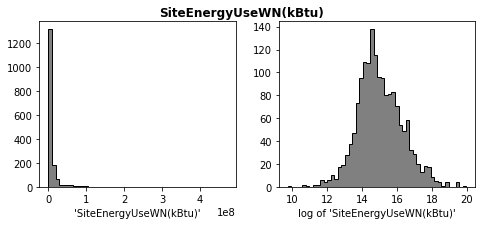

In [20]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['SiteEnergyUseWN(kBtu)'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'SiteEnergyUseWN(kBtu)'")
axs[1].hist(df['SiteEnergyUseWN(kBtu)_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'SiteEnergyUseWN(kBtu)'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('SiteEnergyUseWN(kBtu)', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

#### TotalGHGEmissions

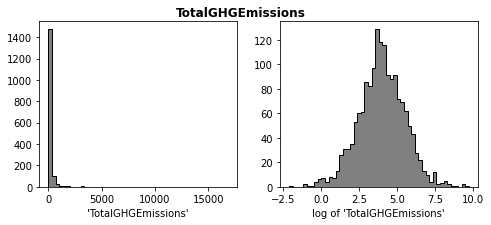

In [21]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['TotalGHGEmissions'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'TotalGHGEmissions'")
axs[1].hist(df['TotalGHGEmissions_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'TotalGHGEmissions'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('TotalGHGEmissions', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

### 1.2 First features selection

#### Quantitative data

Excluding highly correlated quantitative features.
- 'PropertyGFATotal' is strongly correlated with 'PropertyGFABuilding(s)'
- 'PropertyGFABuilding(s)' is strongly correlated with 'LargestPropertyUseTypeGFA'
- 'ExtsurfVolRatio' is strongly correlated with 'NumberofBuildings'

In [22]:
prop_Q_cols_sel = [c for c in prop_Q_cols if c not in\
                              ['PropertyGFATotal',
                               'PropertyGFABuilding(s)',
                               'ExtsurfVolRatio']]

#### Categorical data

Excluding highly related categorical features.
- 'LargestPropertyUseType'(57) is strongly correlated with 'PrimaryPropertyType'(29)

In [23]:
prop_C_cols_sel = [c for c in prop_C_cols if c not in ['LargestPropertyUseType']]

### 1.3 Splitting training and testing set 

In [24]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y1 = df['SiteEnergyUseWN(kBtu)']
df_y2 = df['TotalGHGEmissions']

Since 'PrimaryProperty_Type' seems to be the categorical value the most strongly related (seem ppscores in §2.2 of the Cleaning_EDA notebook) to our target features, we split the data with stratification using this column.

In [25]:
''' 'Neighborhood', 'CouncilDistrictCode', 'ZipCode', 'Outlier', 'BuildingType',
'PrimaryPropertyType', 'EnergyProfile', 'MainEnergy', 'CertifiedPreviousYear' '''

group_col = 'EnergyProfile'

X_tr, X_te, y1_tr, y1_te = train_test_split(df_X, df_y1,
                                            train_size=0.8, shuffle=True,
                                            stratify=df[group_col],
                                            random_state=14)

In [26]:
y1_log_tr, y1_log_te  = np.log(y1_tr), np.log(y1_te)

Training and testing set for linear regression (avoiding colinearity)

In [27]:
X_tr_sel = X_tr[prop_Q_cols_sel+prop_C_cols_sel]
X_te_sel = X_te[prop_Q_cols_sel+prop_C_cols_sel]

Printing the quantitative and categorical independent columns:

In [28]:
print(f'--- {X_tr.columns.shape[0]} independent columns ---\
\nquantitative ({len(prop_Q_cols)}): {prop_Q_cols},\
\ncategorical ({len(prop_C_cols)}): {prop_C_cols}')

--- 25 independent columns ---
quantitative (14): ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'BuildingAge', 'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified', 'ExtsurfVolRatio', 'Outlier'],
categorical (11): ['Neighborhood', 'ZipCode', 'CouncilDistrictCode', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']


In [29]:
print("--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---\n" ,
      set(X_tr.columns) - set(X_tr_sel.columns))

--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---
 {'PropertyGFATotal', 'LargestPropertyUseType', 'PropertyGFABuilding(s)', 'ExtsurfVolRatio'}


### 1.4 Feature transformations

__Quantitative data__

Standardizing the quantitative values.

__Categorical data__

Categorical data are all nominal data, none of them are ordinal. We'll choose between:
- Ordinal Encoding (boolean): 'CertifiedPreviousYear'(2)
- One-Hot Encoding (low cardinality):
'BuildingType'(5), 'MainEnergy'(3), 'EnergyProfile'(8)
- Binary or Hashing or Leave-One-Out target encoding (high cardinality):
('Neighborhood', 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType', 'PrimaryPropertyType')

 NB: The transformation of the columns is all included in the Class CustTransformer (see P4_funtions.py file).

In [30]:
def cv_scores_reg(name, pipe, X, y, cv=5, adj_r2=False):
    res = pd.Series()
    cv_scoring = ['neg_root_mean_squared_error', 'r2']

    cv_scores = cross_validate(pipe, X, y, scoring=cv_scoring,                       
                               cv=cv, return_train_score=True, verbose=1)
    if adj_r2:
        res = pd.Series({'mean_CV_te_RMSE': -cv_scores['test_neg_root_mean_squared_error'].mean(),
	                     'mean_CV_te_R2': cv_scores['test_r2'].mean(),
	                     'mean_CV_te_adjR2': calc_adj_R2(cv_scores['test_r2'],
                                                      y.shape[0]/5,
                                                      X.shape[1]).mean()},
                        name = name)
    else:
	    res = pd.Series({'mean_CV_te_RMSE': -cv_scores['test_neg_root_mean_squared_error'],
	                     'mean_CV_te_R2': cv_scores['test_r2']}, name = name)
    return res

## 2 First model selection

In [31]:
df_res = pd.DataFrame(dtype = 'object')

In [32]:
my_knn = KNeighborsRegressor(n_neighbors=5)

cust_trans = CustTransformer(thresh_card=12,
                             strat_binary='ord',
                             strat_low_card='ohe',
                             strat_high_card='hash',
                             strat_quant='stand').fit(X_tr, y1_tr)
X_tr_enc = cust_trans.transform(X_tr)
my_knn.fit(X_tr_enc, y1_tr)
X_te_enc = cust_trans.transform(X_te)
my_y1_pr = my_knn.predict(X_te_enc)
scores_reg('my_knn', X_te_enc, y1_te, my_y1_pr) 

RMSE   19444444.24
R2            0.44
Name: my_knn, dtype: float64

### 2.0 Dummy Regressor baseline

In [33]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
name_reg = 'Dummy'

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
            'preproc__strat_high_card': ['hash'], # 'hash', 'loo', 'ord' -> best='ord'
            'preproc__strat_quant': ['stand'],
            'Dummy__strategy': ['mean', 'median']}

dum_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'neg_root_mean_squared_error') # neg_root_mean_squared_error

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res

grid
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.6s finished


,Dummy
name_params,"['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat..."
best_params,"['ord', 'ohe', 'hash', 'stand', 'mean']"
RMSE,26021013.25
R2,-0.00
mean_CV_te_RMSE,"[20393658.69651552, 40153348.05960682, 15105244.143094445, 39315729.47141793, 9135758.399624532,..."
mean_CV_te_R2,"[-0.002031737661278177, -0.020948223463576054, -0.00036130216240048973, -0.0006296636234470743, ..."


### 2.1 Linear regression - without regularization

In [34]:
df_lr = pd.DataFrame(dtype = 'object')

#### 'SiteEnergyUse(kBtu)' target

With all the features

In [36]:
reg = LinearRegression()
name_reg = 'LinReg(all)'

pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
pipe.fit(X_tr,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


With selection of the features, trying to avoid colinearity

In [37]:
reg = LinearRegression()
name_reg = 'LinReg(sel)'

pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
pipe.fit(X_tr_sel,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te_sel, y1_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


#### 'SiteEnergyUse(kBtu)_log' target

In [38]:
reg = LinearRegression()
name_reg = 'LinReg_log(all)'

pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
pipe.fit(X_tr,y1_log_tr)

y_pr = pipe.predict(X_te)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_log_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished


Show all the results

In [39]:
df_lr

,LinReg(all),LinReg(sel),LinReg_log(all)
RMSE,20110565.60,19873450.59,0.89
R2,0.40,0.42,0.56
mean_CV_te_RMSE,"[37709086.57469104, 49014045.552459575, 31747817.81785048, 10727172.032091442, 15016591.424172511]","[4.206757456107942e+17, 43812044.230691455, 29745663.60531966, 10727948.676777262, 12796254.5180...","[1.478896202649661, 1.891584802845132, 0.9558226111043934, 0.8665857957271479, 0.9424451844240949]"
mean_CV_te_R2,"[0.035914141694934454, -9.901504003457381, 0.28626248971977586, -1.1145797853407742, -0.35802670...","[-1.1998270075546729e+20, -7.710284760057592, 0.3734466058334568, -1.1148859865647966, 0.0138764...","[0.1103259913337099, -1.095808776374867, 0.5074493714641497, 0.40292920036335167, 0.462640799521..."


### 2.2 Linear Regularized Regressions

In [40]:
'''MODELES REGRESSEURS LINEAIRES DANS SKLEARN : 
Lars, LassoLars, ARDRegression, BayesianRidge, SGDRegressor, HuberRegressor,
RANSACRegressor, TheilSenRegressor, TweedieRegressor, GammaRegressor,
PoissonRegressor, PassiveAggressiveRegressor'''

from sklearn.linear_model import *

In [41]:
# sans optimisation

df_non_opt = pd.DataFrame(dtype = 'object')

for name_reg, reg in zip(['Ridge', 'Lasso', 'ElasticNet', 'Lars', 'LassoLars',
                          'ARDRegression', 'BayesianRidge', 'SGDRegressor',
                          'HuberRegressor', 'RANSACRegressor', 'TheilSenRegressor',
                          'PassiveAggressiveRegressor',
                          'PoissonRegressor', 'TweedieRegressor', 'GammaRegressor'],
                         [Ridge(), Lasso(), ElasticNet(), Lars(), LassoLars(),
                          ARDRegression(), BayesianRidge(), SGDRegressor(),
                          HuberRegressor(), RANSACRegressor(), TheilSenRegressor(),
                          PassiveAggressiveRegressor(),
                          PoissonRegressor(), TweedieRegressor(), GammaRegressor()]):

    pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
    pipe.fit(X_tr,y1_tr)

    df_non_opt = get_append_scores(name_reg, pipe, X_te, y1_te, df_non_opt, cv=6)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [42]:
df_non_opt

,Ridge,Lasso,ElasticNet,Lars,LassoLars,ARDRegression,BayesianRidge,SGDRegressor,HuberRegressor,RANSACRegressor,TheilSenRegressor,PassiveAggressiveRegressor,PoissonRegressor,TweedieRegressor,GammaRegressor
RMSE,20077291.08,20088619.80,20167232.79,20088620.56,20088591.76,26021013.25,26021013.25,20460740.78,21073560.16,605529729179679872.00,19359713.67,25358542.73,71068849.28,20207939.86,76109298.85
R2,0.40,0.40,0.40,0.40,0.40,-0.00,-0.00,0.38,0.34,-541949486866074435584.00,0.45,0.05,-6.47,0.40,-7.56
mean_CV_te_RMSE,"[27669691.61082195, 40840136.76449776, 50398255.1224766, 26817522.340435565, 12174602.408711236,...","[28000293.586870015, 41507674.033200726, 53850765.05849232, 30624033.939456996, 12573040.5770419...","[16569614.320330067, 36612803.07968172, 31591782.6456016, 24795762.974488966, 7845057.33049908, ...","[27991747.653998956, 41334779.289630055, 66050457.26942257, 32507641.003898114, 38350676.7203056...","[28001757.107511822, 41507225.085365586, 53850782.282569334, 30623883.168903757, 12572922.921067...","[20393658.696496814, 40153348.0595613, 15105244.1430699, 39315729.4713797, 9135758.399610097, 13...","[20393658.69649681, 40153348.05956129, 15105244.143069899, 39315729.4713797, 9135758.399610093, ...","[26786637.446553927, 40905993.7882415, 43612106.01978971, 22316224.272100307, 11093595.288165616...","[18100352.43596175, 37148679.220333226, 13243454.699205026, 34516244.66370435, 6224285.524176605...","[7.236179169787416e+17, 36090653.83887431, 13606917.78375818, 30305953.169139203, 15795744.90107...","[15842834.929372773, 35949849.08960512, 17975446.449535646, 22679051.191005684, 6816424.90320524...","[21235400.901115548, 41269266.22432331, 16790848.381455746, 39891239.225658484, 8698013.75413814...","[456144537.3383089, 137952549.5898453, 30716696.80420215, 13635307354.941647, 7594641.737607664,...","[15744239.207110463, 35641994.32245042, 25924227.812667415, 26744492.61365099, 7195562.17022345,...","[46434391.29533341, 197194008.17502156, 11699212.591045987, 226315758.18121588, 7547173.63201200..."
mean_CV_te_R2,"[-0.8445898786817967, -0.05617179748520629, -10.136081132238072, 0.5344374916223131, -1.28841882...","[-0.8889321295472625, -0.09098049447425538, -11.714085874208434, 0.3928926481113867, -1.44065600...","[0.33852111868349477, 0.15115938657513084, -3.375721275502092, 0.6019884733138043, 0.04979309585...","[-0.8877792685115142, -0.08191075248728685, -18.12727237047234, 0.3159125749379541, -21.70764006...","[-0.8891295962917642, -0.09095689446805033, -11.714094007367883, 0.3928986260100643, -1.44061032...","[-0.0020317376594398695, -0.020948223461261017, -0.0003613021591497567, -0.0006296636215006313, ...","[-0.0020317376594396475, -0.020948223461260795, -0.0003613021591495347, -0.0006296636215006313, ...","[-0.7287316489120996, -0.05958081706313778, -7.339029369136155, 0.6776095771540909, -0.900074258...","[0.21065793749866513, 0.12612976707175394, 0.23103961657459582, 0.22876314530821495, 0.401857100...","[-1.2615655088282442e+21, 0.17519802710495547, 0.18825259975589503, 0.40543876120291733, -2.8521...","[0.3952763159067888, 0.18162126830542813, -0.41664409677976977, 0.6670412289715952, 0.2826365471...","[-0.08645592465568308, -0.07848394719844554, -0.23608024359980995, -0.030138818989481786, -0.168...","[-500.2981942436075, -11.050904747066323, -3.136665524950586, -120355.78022079924, 0.10948647133...","[0.4027797255350797, 0.19557754654601023, -1.946544765177789, 0.5369696873957226, 0.200616098306...","[-4.194822313669085, -23.62337732128952, 0.399912402974951, -32.15662262994372, 0.12058347640492..."


In [ ]:
# optimisation de quelques-uns

# param_grid={'preproc__strat_binary': ['ord'],
#             'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
#             'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
#             'preproc__strat_quant': ['stand'],
#             'KNN__n_neighbors': [1,2,3,5,7,11,17,21]}

dict_param_grid = {'my_Ridge': {'preproc__strat_binary': ['ord'],
                                'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                'preproc__strat_quant': ['stand'],
                                'my_Ridge__alpha': np.logspace(-7,7,10)},
                   'my_Lasso': {'preproc__strat_binary': ['ord'],
                                'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                'preproc__strat_quant': ['stand'],
                                'my_Lasso__alpha': np.logspace(-7,7,10)},
                   'my_ElasticNet': {'preproc__strat_binary': ['ord'],
                                    'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                    'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                    'preproc__strat_quant': ['stand'],
                                    'my_ElasticNet__alpha': np.logspace(-7,7,10),
                                    'my_ElasticNet__l1_ratio': [0,0.15,0.3,0.45,0.6,0.75,1]}} # 
                   
li_models = [Ridge(), Lasso(), ElasticNet()]
li_name_models = ['my_Ridge', 'my_Lasso', 'my_ElasticNet']

dict_gscv = {}
for reg, name_reg in zip(li_models, li_name_models):
    param_grid = dict_param_grid[name_reg]
    gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_cv_searchgs=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'neg_root_mean_squared_error')
    df_res = pd.concat([df_res, new_df_res], axis=1)
    dict_gscv[name_reg] = gscv

df_res

In [36]:
reg = ElasticNet()
name_reg = 'my_ElasticNet'

param_grid={'preproc__strat_binary': ['ord'],
                                    'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                    'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                    'preproc__strat_quant': ['stand'],
                                    'my_ElasticNet__alpha': np.logspace(-7,7,10),
                                    'my_ElasticNet__l1_ratio': [0,0.15,0.3,0.45,0.6,0.75,1]}

enet_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'neg_root_mean_squared_error',
                     search_strat='grid')

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res

grid
Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s finished


,my_ElasticNet
name_params,"['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat..."
best_params,"['ord', 'ohe', 'ord', 'stand', 5.994842503189409, 1]"
RMSE,19924241.64
R2,0.41
mean_CV_te_RMSE,"[28003047.416394, 41233792.623090304, 52747720.18223971, 31501982.156300597, 11466113.870259956,..."
mean_CV_te_R2,"[-0.8893037008559306, -0.07663069074438389, -11.198565777644285, 0.35758383630012514, -1.0298242..."


In [ ]:
plot_1D_hyperparam_opt(dict_gscv['my_Ridge'], log_sc=True, param='my_Ridge__alpha')

In [ ]:
plot_1D_hyperparam_opt(dict_gscv['my_Lasso'], log_sc=True, param='my_Lasso__alpha')

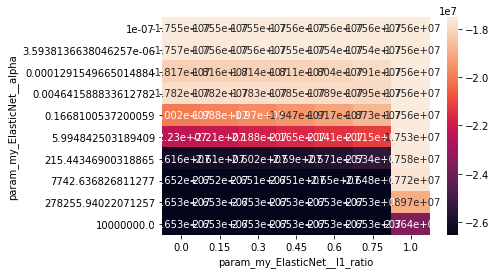

In [67]:
plot_2D_hyperparam_opt(gscv = enet_gscv, params=['my_ElasticNet__alpha', 'my_ElasticNet__l1_ratio'])

In [ ]:
speak('youpi ce fini')

### 2.3 Knn Regressor

Training a Knn regressor on the training set and optimizing nb of neighbors with cross-validation grid search. Putting the results in a dataframe for further comparison with other models.

In [ ]:
def scores_reg(name, Xte, yte, ypr, adj_r2=False):
    # MAE = metrics.mean_absolute_error(yte, ypr)
    MSE = metrics.mean_squared_error(yte, ypr)
    RMSE = np.sqrt(MSE)
    R2 = metrics.r2_score(yte, ypr)
    n = yte.shape[0] # nb of observations
    p = Xte.shape[1] # nb of indep features
    if adj_r2:
        Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
        return pd.Series([RMSE, R2, Adj_R2],
                        index = ['RMSE', 'R2', 'Adj_R2'],
                        name=name)
    else:
        return pd.Series([RMSE, R2],
                     index = ['RMSE', 'R2'],
                     name=name)

In [ ]:
reg = KNeighborsRegressor()
name_reg = 'KNN'

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
            'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            'KNN__n_neighbors': [1,2,3,5,7,9,13]}

knn_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'r2',
                     search_strat='grid') # neg_root_mean_squared_error

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res

Plotting the score of knn vs number of k_neighbors on the training set

In [ ]:
plot_1D_hyperparam_opt(knn_gscv, param='KNN2__n_neighbors')

Plotting the learning curve of knn

In [ ]:
model = knn_gscv.best_estimator_
label = "knn_regressor"
%matplotlib
fig = plot_learning_curve(model, X_tr, y1_tr,
                          train_sizes=np.linspace(0.1,1,15),
                          scoring="r2", label="knn_regressor",
                          c='b') # , fig = fig
%matplotlib inline
fig

### 2.4 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}

reg = RandomForestRegressor()
name_reg = 'RandomForest'
dict_param_grid = {'RandomForest': {'n_estimators' : [10,50,100,300,500], # nb leaves
                            'min_samples_leaf' : [1,3,5,10]}} # mean nb leaves in a node
                           #'max_features': ['auto', 'sqrt']}} # nb features in a tree
# kf_gscv = KFold(n_splits=5, shuffle=True)

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
            'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            'KNN__n_neighbors': [1,2,3,5,7,9,13]}

knn_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'r2',
                     search_strat='grid') # neg_root_mean_squared_error

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res


In [ ]:
rf_gscv.best_params_

In [ ]:
# rf_gscv.best_estimator_.feature_importances_

### 2.5 Support Vector Machine Regression

In [ ]:
from sklearn.svm import SVR


reg = SVR()
name_reg = 'SVR'
dict_param_grid = {'SVR': {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]}}
# kf_gscv = KFold(n_splits=5, shuffle=True)

# version unique
rf_gscv, new_df_res = model_optimizer(name_reg=name_reg, data_preproc=column_trans,
                                 reg=reg, param_grid=dict_param_grid[name_reg],
                                 Xtr=X_tr, ytr=y1_tr, Xte=X_te, yte=y1_te,
                                 cv_search=kf_gscv, cv_test=6)
df_res = pd.concat([df_res, new_df_res], axis=1)

df_res

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

### 2.6 XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid.best_estimator_.feature_importances_

In [ ]:
# import dill
# file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'wb')
# dill.dump(dict_gscv, file)

In [ ]:
# file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'rb')
# dict_gscv = dill.load(file)